In [1]:
## Week 3 derivable: Interactive figure
## This is the derivable for week 3 of the BHS, by Jonathan Gallego
## This code generates an interactive figure to display functional connectivity  matrices from the 
## preprocessed fMRI data from 12 subjects of the Human Conectomme Project database.

## This notebook loads the fMRI timeseries (all_subjects_fmri_time_series.csv) that were generated 
## on a previous script using nilearn tools (see fMRI_processing.ipynb). 
## It then calls nilearn functions to set the atlas labels and plot the functional connectivity (correlations),
## as a matrix (or as a graph). Ipywidgets are then used to create an interactive figure to easily scroll
## between different subjects.

In [2]:
# First we set up the tools we will be using

# Ipywidgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# nilearn tools
from nilearn import datasets
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure

# numpy
import numpy as np

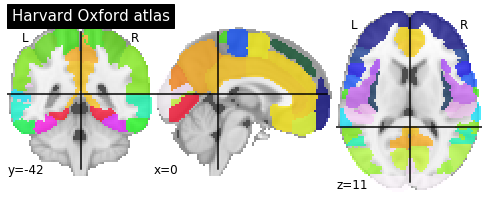

In [3]:
# Then define the atlas (here Harvar Oxford fsl)
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm') # select specific altas from downloaded fsl folder
atlas_filename = dataset.maps
labels = dataset.labels


# plot atlas with title
from nilearn import plotting

plotting.plot_roi(atlas_filename, title="Harvard Oxford atlas")
plotting.show()

In [4]:
# Load our fMRI scout time series from all subjects (Created as the output from the fMRI_timeseries_notebook)
# Change path to your path to the file
# File available in the GitHub repo
matrix = np.loadtxt('/media/jonathan/Data/McGill/BHS/BHS_project_Jonathan/all_subjects_fmri_time_series.csv', delimiter=',')
# print(matrix.shape)

(14400, 48)


In [5]:
# Create interactive figure

mat = np.zeros((1200,48)) # Pre-allocate matrix
def f(x):
    if x == 0:
        mat[:,:]= matrix[range(0,1200),:]
    elif x== 1:
        mat[:,:]= matrix[range(1200,2400),:]
    elif x== 2:
        mat[:,:]= matrix[range(2400,3600),:]
    elif x== 3:
        mat[:,:]= matrix[range(3600,4800),:]
    elif x== 4:
        mat[:,:]= matrix[range(4800,6000),:]
    elif x== 5:
        mat[:,:]= matrix[range(6000,7200),:]
    elif x== 6:
        mat[:,:]= matrix[range(7200,8400),:]
    elif x== 7:
        mat[:,:]= matrix[range(8400,9600),:]
    elif x== 8:
        mat[:,:]= matrix[range(9600,10800),:]
    elif x== 9:
        mat[:,:]= matrix[range(10800,12000),:]
    elif x== 10:
        mat[:,:]= matrix[range(12000,13200),:]
    elif x== 11:
        mat[:,:]= matrix[range(13200,14400),:]
    elif x== 12:
        mat[:,:]= matrix[range(14400,15600),:]
              
    c = str(x+1)            
    title = 'Subject '+c+' fMRI Connectivity Matrix'
    print(title)
    # Compute connectivity matrix (similar results to the one obtained before)
    from nilearn.connectome import ConnectivityMeasure
    correlation_measure = ConnectivityMeasure(kind='correlation')
    correlation_matrix = correlation_measure.fit_transform([mat])[0]

    # Plot the correlation matrix 
    np.fill_diagonal(correlation_matrix, 0) # mask the main diagonal for visualization
    f = plotting.plot_matrix(correlation_matrix, figure=(15, 12), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=False)
    
    # plot functional connectivity as a graph
    # grab center coordinates for atlas labels
    # coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)

    # plot connectome with 80% edge strength in the connectivity
    # plotting.plot_connectome(correlation_matrix, coordinates,edge_threshold="80%",title='Connectivity graph')
    

In [6]:
# Display interactive figure
interact(f, x=[('Subject 1', 0), ('Subject 2', 1), ('Subject 3', 2), ('Subject 4', 3), ('Subject 5', 4), 
             ('Subject 6', 5), ('Subject 7', 6), ('Subject 8', 7), ('Subject 9', 8), ('Subject 10', 9), 
             ('Subject 11', 10), ('Subject 12', 11)]);

interactive(children=(Dropdown(description='x', options=(('Subject 1', 0), ('Subject 2', 1), ('Subject 3', 2),…